# MS 274 Homework 8
In this homework, you will analyze and interpret sea ice trends in two rapidly changing marginal seas in the Antarctic Ocean: the Weddell Sea and the Amundsen Sea. 

#### Import the modules

In [1]:
# import the numpy, matplotlib, netcdf, os, and datetime modules
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import datetime as dt

## Problem 8.1: Download Southern Hemisphere Sea Ice Data
To begin this assignment, download all of the available sea ice concentration date from the National Snow and Ice Data Center.

#### Define a data path and download the data
In the code block below, define a `file_folder` where you will download the sea ice data. Be sure this folder exists on your file system.

In [2]:
# define a path to your raster files folder 
file_folder = 'D:\Homework 8\data'

Next, copy over the **Download Data from NSIDC** notebook from Lab 8 and modify the code to download all monthly sea ice concentration data for the southern hemisphere.

## Problem 8.2: Make Timeseries of Sea Ice in the Weddell Sea and the Amundsen Sea
Chapter 9 of the most recent IPCC Assessment Report, found [HERE](https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-9/), describes recent trends in the Weddell Sea and the Amundsen Sea. These two regions can be roughly defined by the boxes with the extents defined below:

In [3]:
# Weddell Sea
min_x_weddell = 1748344
min_y_weddell = -2139981
max_x_weddell = 2626968
max_y_weddell = -581133

# Amundsen Sea
min_x_amundsen = -1635773
min_y_amundsen = -1816875
max_x_amundsen = -1352346
max_y_amundsen = -558459

The above coordinates are provided in the *NSIDC Sea Ice Polar Stereographic South* projection (EPSG: 3412). This is the same projection as for the x and y grids distriburted with the Southern Hemisphere sea ice data.

### Create two timeseries
Using the files downloaded in Problem 8.1, generate two timeseries of sea ice area - one for the Weddell Sea and one for the Amundsen Sea.

In [4]:
file_list_seaice = []

import os

for file_name_seaice in os.listdir(file_folder):
    
      if file_name_seaice[-3:] == '.nc':
          file_list_seaice.append(file_name_seaice)

file_list_seaice.sort()
#print(file_list_seaice)

date_list = []

for file_name_seaice in file_list_seaice:
    
    date_str = file_name_seaice.split('_')
    
    year = date_str[-3][:4]
    month = date_str[-3][4:6]
    day = '3'
    date_str = year+'-'+month+'-01'
    file_path = os.path.join(file_folder, file_name_seaice)
    ds = nc4.Dataset(file_path)
    sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
    ds.close()
    sea_ice_raveled = sea_ice.ravel()
    sea_ice_filtered = sea_ice_raveled[sea_ice_raveled<2]
    area = np.sum(sea_ice_filtered*25*25)
    
    if area>0:
        date_list.append(date_str)
       
        
date_array=np.array(date_list, dtype='datetime64')

In [5]:
min_x_weddell = 1748344
min_y_weddell = -2139981
max_x_weddell = 2626968
max_y_weddell = -581133

file_path = os.path.join(file_folder, 'seaice_conc_monthly_sh_197901_n07_v04r00.nc')

ds = nc4.Dataset(file_path)
x_wed = np.array(ds.variables['xgrid'])
y_wed = np.array(ds.variables['ygrid'])
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close()

In [6]:
min_col_weddell = np.argmin(np.abs(x_wed-min_x_weddell))
max_col_weddell = np.argmin(np.abs(x_wed-max_x_weddell))
max_row_weddell = np.argmin(np.abs(y_wed-min_y_weddell))
min_row_weddell = np.argmin(np.abs(y_wed-max_y_weddell))

print('min_col', min_col_weddell)
print('max_col', max_col_weddell)
print('min_row', min_row_weddell)
print('max_row', max_row_weddell)

min_col 227
max_col 263
min_row 197
max_row 259


In [7]:
ds = nc4.Dataset(file_path)
x_am = np.array(ds.variables['xgrid'])
y_am = np.array(ds.variables['ygrid'])
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close() 
 
print(np.shape(sea_ice))

sea_ice_weddell = sea_ice[0, :, :]

seaice_sub_weddell = sea_ice_weddell[min_row_weddell:max_row_weddell, min_col_weddell:max_col_weddell]

print(np.shape(seaice_sub_weddell))

(1, 332, 316)
(62, 36)


In [8]:
min_x_amundsen = -1635773
min_y_amundsen = -1816875
max_x_amundsen = -1352346
max_y_amundsen = -558459

file_path = os.path.join(file_folder, 'seaice_conc_monthly_sh_197901_n07_v04r00.nc')

ds = nc4.Dataset(file_path)
x_am = np.array(ds.variables['xgrid'])
y_am = np.array(ds.variables['ygrid'])
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close()

In [9]:
min_col_amundsen = np.argmin(np.abs(x_am-min_x_amundsen))
max_col_amundsen = np.argmin(np.abs(x_am-max_x_amundsen))
max_row_amundsen = np.argmin(np.abs(y_am-min_y_amundsen))
min_row_amundsen = np.argmin(np.abs(y_am-max_x_amundsen))
# print the indices to be sure these are ordered correctly
print('min_col', min_col_amundsen)
print('max_col', max_col_amundsen)
print('min_row', min_row_amundsen)
print('min_row', max_col_amundsen)

min_col 92
max_col 103
min_row 228
min_row 103


In [10]:
ds = nc4.Dataset(file_path)
x_am = np.array(ds.variables['xgrid'])
y_am = np.array(ds.variables['ygrid'])
sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
ds.close() 
 
print(np.shape(sea_ice))

sea_ice_amundsen = sea_ice[0, :, :]

seaice_sub_amundsen = sea_ice_amundsen[min_row_amundsen:max_row_amundsen, min_col_amundsen:max_col_amundsen]

print(np.shape(seaice_sub_amundsen))

(1, 332, 316)
(18, 11)


In [11]:
file_list_seaice = []

import os

for file_name_seaice in os.listdir(file_folder):
    
      if file_name_seaice[-3:] == '.nc':
          file_list_seaice.append(file_name_seaice)

file_list_seaice.sort()
#print(file_list_seaice)

date_list = []
seaice_values_wed = []
seaice_values_am = []

for file_name_seaice in file_list_seaice:
    
    date_str = file_name_seaice.split('_')
    
    year = date_str[-3][:4]
    month = date_str[-3][4:6]
    day = '3'
    date_str = year+'-'+month+'-01'
    file_path = os.path.join(file_folder, file_name_seaice)
    ds = nc4.Dataset(file_path)
    sea_ice = np.array(ds.variables['nsidc_nt_seaice_conc_monthly'])
    ds.close()
    sea_ice_raveled = sea_ice.ravel()
    sea_ice_filtered = sea_ice_raveled[sea_ice_raveled<2]
    area = np.sum(sea_ice_filtered*25*25)
    sea_ice_amundsen = sea_ice[0, :, :]

    seaice_sub_amundsen = sea_ice_amundsen[min_row_amundsen:max_row_amundsen, min_col_amundsen:max_col_amundsen]

    sea_ice_raveled_am = seaice_sub_amundsen.ravel()
    sea_ice_filtered_am = sea_ice_raveled_am[sea_ice_raveled_am<2]
    area_am = np.sum(sea_ice_filtered_am*25*25)
    
    sea_ice_weddell = sea_ice[0, :, :]
    
    seaice_sub_weddell = sea_ice_weddell[min_row_weddell:max_row_weddell, min_col_weddell:max_col_weddell]
    
    sea_ice_raveled_wed = seaice_sub_weddell.ravel()
    sea_ice_filtered_wed = sea_ice_raveled_wed[sea_ice_raveled_wed<2]
    area_wed = np.sum(sea_ice_filtered_wed*25*25)
    
    if area>0:
        date_list.append(date_str)
        seaice_values_wed.append(area_wed)
        seaice_values_am.append(area_am)
        
date_array=np.array(date_list, dtype='datetime64')

## Problem 8.3: Subset the timeseries to March
In the southern hemisphere, the sea ice minimum occurs around March of each year. Create two timeseries subsets from the Weddell and Amundsen timeseries for March values only. Store the dates as decimal years so that trends can be computed in the next step

In [12]:
# define a function to turn a date, given by year, month, and day, into a decimal year
def YMD_to_DecYr(year,month,day):
    
    date = dt.datetime(year,month,day)

    start = dt.date(date.year, 1, 1).toordinal()

    year_length = dt.date(date.year+1, 1, 1).toordinal() - start

    decimal_fraction = float(date.toordinal() - start) / year_length

    dec_yr = year+decimal_fraction
    return(dec_yr)

In [13]:
march_date_weddell = []
march_values_weddell = []

for i in range(len(date_array)):

    date = date_array[i]
    value_wed = seaice_values_wed[i]
    
    date_datetime = date.astype(dt.datetime)
    #print(date_datetime.month)

    if date_datetime.month == 3:
        march_date_weddell.append(date)
        march_values_weddell.append(value_wed)

In [14]:
# subset the timeseries to march 
march_decyrs_wed = []

for date in march_date_weddell:
    year = int(str(date)[:4])
    month = int(str(date)[5:7]) 
    day = int(str(date)[8:10])
    decyr = YMD_to_DecYr(year,month,day)
    march_decyrs_wed.append(decyr)

print(march_decyrs_wed)

[1979.1616438356164, 1980.1639344262296, 1981.1616438356164, 1982.1616438356164, 1983.1616438356164, 1984.1639344262296, 1985.1616438356164, 1986.1616438356164, 1987.1616438356164, 1988.1639344262296, 1989.1616438356164, 1990.1616438356164, 1991.1616438356164, 1992.1639344262296, 1993.1616438356164, 1994.1616438356164, 1995.1616438356164, 1996.1639344262296, 1997.1616438356164, 1998.1616438356164, 1999.1616438356164, 2000.1639344262296, 2001.1616438356164, 2002.1616438356164, 2003.1616438356164, 2004.1639344262296, 2005.1616438356164, 2006.1616438356164, 2007.1616438356164, 2008.1639344262296, 2009.1616438356164, 2010.1616438356164, 2011.1616438356164, 2012.1639344262296, 2013.1616438356164, 2014.1616438356164, 2015.1616438356164, 2016.1639344262296, 2017.1616438356164, 2018.1616438356164, 2019.1616438356164, 2020.1639344262296, 2021.1616438356164, 2022.1616438356164]


In [15]:
march_date_amundsen = []
march_values_amundsen = []

for i in range(len(date_array)):

    date = date_array[i]
    value_am = seaice_values_am[i]
    
    date_datetime = date.astype(dt.datetime)
    #print(date_datetime.month)

    if date_datetime.month == 3:
        march_date_amundsen.append(date)
        march_values_amundsen.append(value_am)

#print(march_date_amundsen)

In [16]:
# subset the timeseries to march 
march_decyrs_am = []

for date in march_date_amundsen:
    year = int(str(date)[:4])
    month = int(str(date)[5:7]) 
    day = int(str(date)[8:10])
    decyr = YMD_to_DecYr(year,month,day)
    march_decyrs_am.append(decyr)

print(march_decyrs_am)

[1979.1616438356164, 1980.1639344262296, 1981.1616438356164, 1982.1616438356164, 1983.1616438356164, 1984.1639344262296, 1985.1616438356164, 1986.1616438356164, 1987.1616438356164, 1988.1639344262296, 1989.1616438356164, 1990.1616438356164, 1991.1616438356164, 1992.1639344262296, 1993.1616438356164, 1994.1616438356164, 1995.1616438356164, 1996.1639344262296, 1997.1616438356164, 1998.1616438356164, 1999.1616438356164, 2000.1639344262296, 2001.1616438356164, 2002.1616438356164, 2003.1616438356164, 2004.1639344262296, 2005.1616438356164, 2006.1616438356164, 2007.1616438356164, 2008.1639344262296, 2009.1616438356164, 2010.1616438356164, 2011.1616438356164, 2012.1639344262296, 2013.1616438356164, 2014.1616438356164, 2015.1616438356164, 2016.1639344262296, 2017.1616438356164, 2018.1616438356164, 2019.1616438356164, 2020.1639344262296, 2021.1616438356164, 2022.1616438356164]


## Problem 8.4: Compute the March trends of Sea Ice in the Weddell and Amundsen Seas
Compute the trends in sea ice area in March for the Weddell Sea and the Amundsen Sea. (Be sure to convert the dates to decimal years if you have not done so already.)

In [17]:
# use numpy's polyfit function to compute the weddell trend
p = np.polyfit(march_decyrs_wed, march_values_weddell, 1)
print(p)

slope = p[0]

intercept = p[1]

best_fit_line_wed = slope*np.array(march_decyrs_wed) + intercept

[ 8.74409955e+02 -1.66284768e+06]


In [18]:
# use numpy's polyfit function to compute the amundsen trend
p = np.polyfit(march_decyrs_am, march_values_amundsen, 1)
print(p)

slope = p[0]

intercept = p[1]

best_fit_line_am = slope*np.array(march_decyrs_am) + intercept

[-5.28242909e+02  1.07056873e+06]


## Problem 8.5: Plot the March Sea Ice Timeseries for the Weddell Sea and Amundsen Sea 
Plot the March sea ice timeseries on two separate plots. In addition, plot the trend lines and include a label in the legend which shows the trend in sea ice area. Be sure to add labels to the axis and gridlines to your plot.

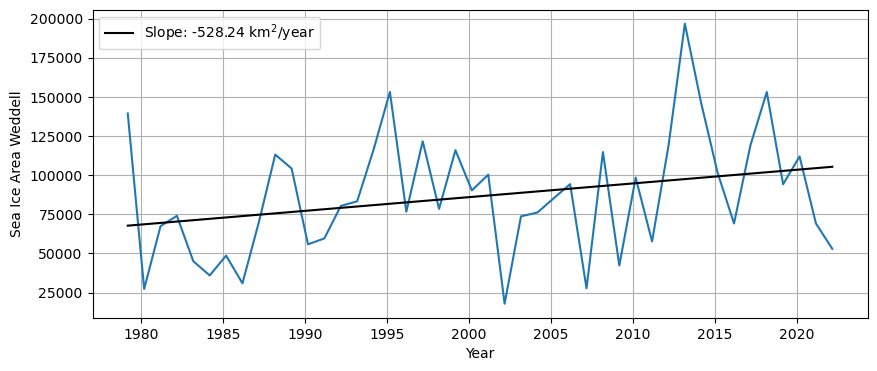

In [25]:
# make a figure with two subplot to show the timeseries and trends
plt.figure(figsize=(10,4))


# show the figure
plt.show

# plot the september values
plt.plot(march_date_weddell, march_values_weddell)

# plot the line of the best fit 
plt.plot(march_date_weddell, best_fit_line_wed, 'k-', label='Slope: '+'{:.2f}'.format(slope)+' km$^2$/year')

# label the y axis
plt.ylabel('Sea Ice Area Weddell')
plt.xlabel('Year')
# make a legend
plt.legend()
plt.grid()
# show the figure
plt.show;

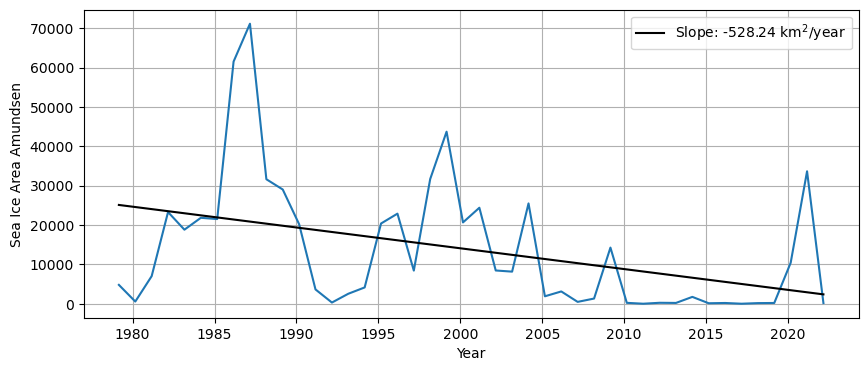

In [26]:
plt.figure(figsize=(10,4))


# show the figure
plt.show

# plot the september values
plt.plot(march_date_amundsen, march_values_amundsen)

# plot the line of the best fit 
plt.plot(march_date_amundsen, best_fit_line_am, 'k-', label='Slope: '+'{:.2f}'.format(slope)+' km$^2$/year')

# label the y axis
plt.ylabel('Sea Ice Area Amundsen')
plt.xlabel('Year')
# make a legend
plt.legend()
plt.grid()

# show the figure
plt.show;

## Problem 8.6: Interpret the Changes in Antarctic Sea Ice
Comment on the trends observed in the Weddell vs Amundsen sea. How do they compare? 

The most recent IPCC Assessment Report, Chapter 9 provides a synopsis of recent research on Antarctic sea ice (in addition to many other topics). The chapter can be accessed in PDF form from a link [HERE](https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-9/). What does this report say about how these trends contribute to the overall trend in Antarctic sea ice? What is one reason why Antarctic sea ice might be changing?

In Weddell sea ice area is increasing, while Amundsen sea ice is decreasing.
In the Weddell Sea, changes in wind patterns increase surface ocean stratification, contributing to greater sea ice coverage. In contrast, in the Amundsen Sea, strong ice melt on the shelf causes local sea ice to melt next to the ice shelf by entraining warm Circumpolar Deep Water into the ice shelf cavity and the surface ocean causing surface freshing, as indicated by this IPCC assessment report. One key point is that these trends are primarily due to changes in sea ice drift and decay, with medium confidence regarding changes in wind patterns.